# Центральная предельная теорема 


Импортируем необходимые библиотеки.

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

**Выбранное распределение** - хи-квадрат, https://en.wikipedia.org/wiki/Chi-squared_distribution.

**Теоретические параметры:**

$$\mathbb{E}\mathrm{X} = k$$
$$\mathbb{D}\mathrm{X} = 2k$$

Задаем параметры распределения и генерируем выборку из 1000 элементов.

In [4]:
k = 3
chi2 = sts.chi2(k)
sample = chi2.rvs(1000)

Задаем область определения функции плотности вероятности и саму функцию.

In [5]:
ran = np.linspace(0, 30, 500)
pdf = chi2.pdf(ran)

Строим график функции и гистограмму выборки.

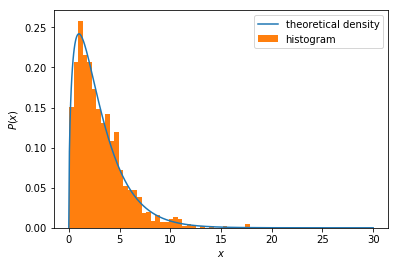

In [6]:
plt.plot(ran, pdf, label='theoretical density')
plt.hist(sample, bins=40, normed=True, label='histogram')
plt.legend()
plt.ylabel('$P(x)$')
plt.xlabel('$x$')
plt.show()

Теперь выберем несколько значений $n$ - объема выборки и зададим диапазон, на котором будем рассматривать распределение выборочных средних.

In [7]:
numbers = [5, 15, 50, 100]
ran = np.linspace(0, 10, 500)

Пользуясь центральной предельной теоремой, подсчитаем параметры нормального распределения, которым описывается распределение выборочных средних.

$$ \bar{X_n} \approx N\left(\mathbb{E}\mathrm{X}, \frac{\mathbb{D}\mathrm{X}}n\right), \quad \text{т.е.} $$
$$ \mu = \mathbb{E}\mathrm{X} = k, \quad \sigma = \sqrt{\frac{\mathbb{D}\mathrm{X}}n} = \sqrt{\frac{2k}n} $$
Эти $\mu$ и $\sigma$ мы передадим в функцию $\mathtt{sts.norm}()$

Теперь построим графики для четырех значений $n$:

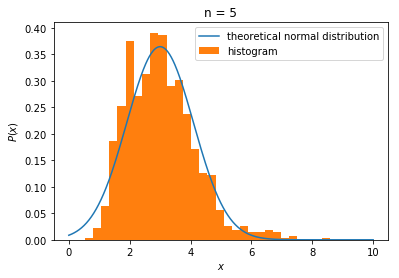

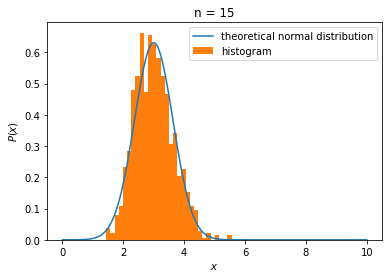

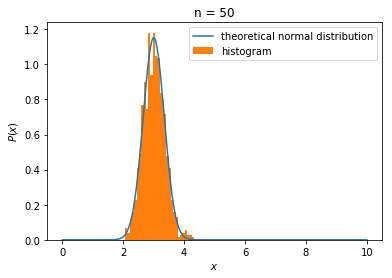

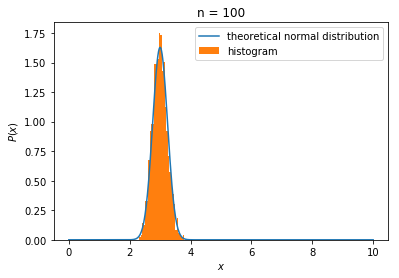

In [8]:
for n in numbers:
    means = []
    for i in range(1000):
        mean = 0
        sample1 = chi2.rvs(n)
        for element in sample1: # подсчет среднего значения 
            mean += element
        mean = float(mean) / n
        means.append(mean)
    # теоретическая функция нормального распределения:
    norm_dist = sts.norm(k, np.sqrt(2*float(k)/n)) 
    normpdf = norm_dist.pdf(ran)
    # строим графики
    plt.plot(ran, normpdf, label='theoretical normal distribution')
    plt.hist(means, bins=30, normed=True, label='histogram')
    plt.legend()
    plt.title('n = %s' % n)
    plt.ylabel('$P(x)$')
    plt.xlabel('$x$')
    plt.show()

## Вывод:
Первые две гистограммы сдвинуты чуть влево относительно пика нормального распределения, однако при больших $n$ распределение выборочных средних очень хорошо описывается центральной предельной теоремой, как и предполагалось. 